<a href="https://colab.research.google.com/github/Krishan-Kumar-kk/Recomendation-system/blob/main/Content_based_recommender_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content-based recommender systems

***`A content-based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on those recommendations, the engine becomes more and more accurate.
A recommender system has to decide between two methods for information delivery when providing the user with recommendations:
Exploitation. The system chooses documents similar to those for which the user has already expressed a preference.
Exploration. The system chooses documents where the user profile does not provide evidence to predict the user’s reaction.
Now that we’ve taken a broad look at what recommender systems are and the different variations, let’s work through an implementation of a content-based filtering system.`***

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

***`The TF*IDF algorithm is used to weigh a keyword in any document and assign the importance to that keyword based on the number of times it appears in the document. Put simply, the higher the TF*IDF score (weight), the rarer and more important the term, and vice versa.
Mathematically [don’t worry it’s easy :)],
Each word or term has its respective TF and IDF score. The product of the TF and IDF scores of a term is called the TF*IDF weight of that term.
The TF (term frequency) of a word is the number of times it appears in a document. When you know it, you’re able to see if you’re using a term too often or too infrequently.`***

***`TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).`***

**The IDF (inverse document frequency) of a word is the measure of how significant that term is in the whole corpus.**


***`IDF(t) = log_e(Total number of documents / Number of documents with term t in it).***

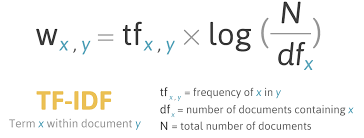

In [4]:
ds = pd.read_csv("https://raw.githubusercontent.com/nikitaa30/Content-based-Recommender-System/master/sample-data.csv")
ds

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."
...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...
496,497,Cap 2 crew - This crew takes the edge off fick...
497,498,All-time shell - No need to use that morning T...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...


In [7]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(ds['description'])


**Here, the tfidf_matrix is the matrix containing each word and its TF-IDF score with regard to each document, or item in this case. Also, stop words are simply words that add no significant value to our system, like ‘an’, ‘is’, ‘the’, and hence are ignored by the system.

```

```

**

In [8]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

***`Vector Space Model
In this model, each item is stored as a vector of its attributes (which are also vectors) in an n-dimensional space, and the angles between the vectors are calculated to determine the similarity between the vectors.`***

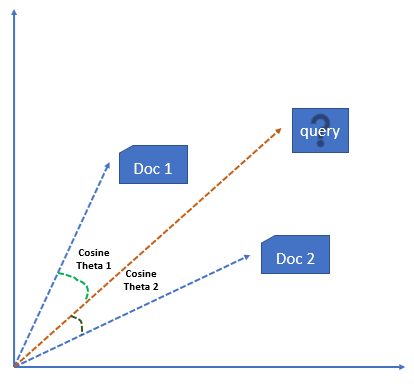

***The method of calculating the user’s likes / dislikes / measures is calculated by taking the cosine of the angle between the user profile vector (Ui ) and the document vector; or in our case, the angle between two document vectors.
The ultimate reason behind using cosine is that the value of cosine will increase as the angle between vectors with decreases, which signifies more similarity.
The vectors are length-normalized, after which they become vectors of length 1.
Calculating Cosine Similarity
***
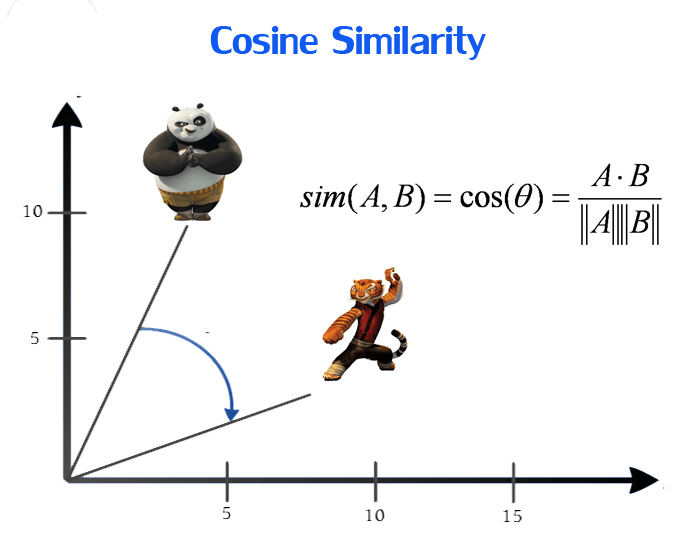

In [13]:
results = {}
for idx, row in ds.iterrows():
   similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
   similar_items = [(cosine_similarities[idx][i], ds['id'][i]) for i in similar_indices] 
   results[row['id']] = similar_items[1:]

print('done!')

done!


**Here we’ve calculated the cosine similarity of each item with every other item in the dataset, and then arranged them according to their similarity with item i, and stored the values in results.**

# Making a recommendation

In [16]:
def item(id):
    return ds.loc[ds['id'] == id]['description'].tolist()[0].split(' - ')[0]

In [19]:

# Just reads the results out of the dictionary.
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")


In [18]:
recommend(item_id=11, num=5)   #**result**

Recommending 5 products similar to Baby sunshade top...
-------
Recommended: Sunshade hoody (score:0.21330296021085024)
Recommended: Baby baggies apron dress (score:0.10975311296284812)
Recommended: Runshade t-shirt (score:0.09988151262780731)
Recommended: Runshade t-shirt (score:0.09530698241688207)
Recommended: Runshade top (score:0.08510550093018411)
